In [373]:
import numpy as np
import pandas as pd
import loompy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import pingouin as pg
import matplotlib
matplotlib.rcParams['figure.dpi']= 300
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from copy import deepcopy
import heapq
import os
from openpyxl import load_workbook

### Import Average dN/dS

In [77]:
avg_dNdS_df=pd.read_csv('../results/Ensembl98_mouse/mouse.dNdS_stats.all_genes.tsv',sep='\t',usecols=['Gene stable ID','Gene name','mean'],index_col='Gene stable ID')

In [78]:
avg_dNdS_df.rename(columns={'mean':'avg_dNdS'},inplace=True)

In [310]:
avg_dNdS_df.avg_dNdS.to_numpy().shape[0]

19388

### Structures of loom file

In [80]:
agg = loompy.connect('../data/single-cell/zeisel_2018/l5_all.agg.loom')

In [85]:
np.unique(agg.ca.Class)

array(['Astrocytes', 'Ependymal', 'Immune', 'Neurons', 'Oligos',
       'PeripheralGlia', 'Vascular'], dtype=object)

In [93]:
TaxonomyRank1_list = np.unique(agg.ca.TaxonomyRank1).tolist()

In [108]:
TaxonomyRank1_list

['Glia', 'Immune cells', 'Neurons', 'Vascular cells']

In [190]:
TaxonomyRank4_list = np.unique(agg.ca.TaxonomyRank4).tolist()

In [219]:
rank1_expressed_avg_dNdS_df_dict = {}
rank1_expressed_median_avg_dNdS_dict={}
for celltype in TaxonomyRank1_list:
    accession_list = agg.ra.Accession[(np.all(agg['trinaries'][:,agg.ca.TaxonomyRank1==celltype]>=0.9,axis=1))].tolist()
    rank1_expressed_avg_dNdS_df_dict[celltype]=avg_dNdS_df[avg_dNdS_df.index.isin(accession_list)]
    rank1_expressed_median_avg_dNdS_dict[celltype]=np.median(rank1_expressed_avg_dNdS_df_dict[celltype]['avg_dNdS'])

In [220]:
{k: v for k, v in sorted(rank1_expressed_median_avg_dNdS_dict.items(), key=lambda item: item[1])}

{'Neurons': 0.07377596646182324,
 'Vascular cells': 0.07399384003517914,
 'Immune cells': 0.0762460947716919,
 'Glia': 0.0778744914356361}

In [87]:
np.unique(agg.ca.TaxonomyRank2)

array(['CNS glia', 'CNS neurons', 'Immune cells',
       'Neural crest-like glia', 'PNS neurons', 'Vascular cells'],
      dtype=object)

In [88]:
np.unique(agg.ca.TaxonomyRank3)

array(['Astroependymal cells', 'Cerebellum neurons',
       'Cholinergic, monoaminergic and peptidergic neurons',
       'Di- and mesencephalon neurons', 'Enteric neurons',
       'Hindbrain neurons', 'Immature neural', 'Immune cells',
       'Neural crest-like glia', 'Oligodendrocytes',
       'Peripheral sensory neurons', 'Spinal cord neurons',
       'Sympathetic neurons', 'Telencephalon interneurons',
       'Telencephalon projecting neurons', 'Vascular cells'], dtype=object)

In [89]:
np.unique(agg.ca.TaxonomyRank4)

array(['Astrocytes', 'Cerebellum neurons',
       'Cholinergic and monoaminergic neurons',
       'Choroid epithelial cells', 'Dentate gyrus granule neurons',
       'Dentate gyrus radial glia-like cells',
       'Di- and mesencephalon excitatory neurons',
       'Di- and mesencephalon inhibitory neurons', 'Enteric glia',
       'Enteric neurons', 'Ependymal cells', 'Glutamatergic neuroblasts',
       'Hindbrain neurons', 'Microglia', 'Non-glutamatergic neuroblasts',
       'Olfactory ensheathing cells', 'Olfactory inhibitory neurons',
       'Oligodendrocyte precursor cells', 'Oligodendrocytes',
       'Peptidergic neurons', 'Pericytes',
       'Peripheral sensory neurofilament neurons',
       'Peripheral sensory non-peptidergic neurons',
       'Peripheral sensory peptidergic neurons',
       'Perivascular macrophages', 'Satellite glia', 'Schwann cells',
       'Spinal cord excitatory neurons', 'Spinal cord inhibitory neurons',
       'Subcommissural organ hypendymal cells',
       

In [222]:
agg.ca.TaxonomyRank4[agg.ca.Class=='Vascular']

array(['Enteric glia', 'Vascular and leptomeningeal cells',
       'Vascular and leptomeningeal cells',
       'Vascular and leptomeningeal cells',
       'Vascular smooth muscle cells', 'Vascular smooth muscle cells',
       'Vascular smooth muscle cells', 'Pericytes', 'Pericytes',
       'Vascular endothelial cells', 'Vascular endothelial cells'],
      dtype=object)

In [197]:
expressed_avg_dNdS_df_dict = {}
expressed_median_avg_dNdS_dict={}
for celltype in TaxonomyRank4_list:
    accession_list = agg.ra.Accession[(np.any(agg['trinaries'][:,agg.ca.TaxonomyRank4==celltype]>=0.999,axis=1))].tolist()
    expressed_avg_dNdS_df_dict[celltype]=avg_dNdS_df[avg_dNdS_df.index.isin(accession_list)]
    expressed_median_avg_dNdS_dict[celltype]=np.median(expressed_avg_dNdS_df_dict[celltype]['avg_dNdS'])

In [198]:
{k: v for k, v in sorted(expressed_median_avg_dNdS_dict.items(), key=lambda item: item[1])}

{'Cerebellum neurons': 0.0653664116228747,
 'Dentate gyrus granule neurons': 0.0671905495212993,
 'Telencephalon projecting inhibitory neurons': 0.0676690900669864,
 'Olfactory inhibitory neurons': 0.0676752249627056,
 'Glutamatergic neuroblasts': 0.06792556748553825,
 'Spinal cord inhibitory neurons': 0.0681656271249338,
 'Spinal cord excitatory neurons': 0.0683770722288408,
 'Non-glutamatergic neuroblasts': 0.06889930330386654,
 'Peptidergic neurons': 0.06892126269485015,
 'Hindbrain neurons': 0.0704018510922277,
 'Di- and mesencephalon inhibitory neurons': 0.07062060020303565,
 'Peripheral sensory neurofilament neurons': 0.0712481253110028,
 'Telencephalon inhibitory interneurons': 0.0720017512071503,
 'Di- and mesencephalon excitatory neurons': 0.0721065562074476,
 'Oligodendrocyte precursor cells': 0.07216169700038949,
 'Telencephalon projecting excitatory neurons': 0.0723072907218913,
 'Peripheral sensory peptidergic neurons': 0.0743665370007806,
 'Cholinergic and monoaminergic n

In [209]:
enriched_avg_dNdS_df_dict = {}
enriched_median_avg_dNdS_dict={}
for celltype in TaxonomyRank4_list:
    accession_list = agg.ra.Accession[(np.any(agg['enrichment_q'][:,agg.ca.TaxonomyRank4==celltype]<0.05,axis=1))].tolist()
    enriched_avg_dNdS_df_dict[celltype]=avg_dNdS_df[avg_dNdS_df.index.isin(accession_list)]
    enriched_median_avg_dNdS_dict[celltype]=np.median(enriched_avg_dNdS_df_dict[celltype]['avg_dNdS'])

In [210]:
{k: v for k, v in sorted(enriched_median_avg_dNdS_dict.items(), key=lambda item: item[1])}

{'Cerebellum neurons': 0.0772775580255773,
 'Olfactory inhibitory neurons': 0.079824124106312,
 'Dentate gyrus granule neurons': 0.08204194008122764,
 'Glutamatergic neuroblasts': 0.0836774333909241,
 'Spinal cord excitatory neurons': 0.08512258612338724,
 'Spinal cord inhibitory neurons': 0.0859812462849008,
 'Peripheral sensory neurofilament neurons': 0.0905091283195335,
 'Peptidergic neurons': 0.09146212619610115,
 'Di- and mesencephalon inhibitory neurons': 0.0937784546449103,
 'Telencephalon projecting inhibitory neurons': 0.09449066657997954,
 'Sympathetic cholinergic neurons': 0.09489954567662655,
 'Telencephalon inhibitory interneurons': 0.095866428177223,
 'Hindbrain neurons': 0.0959873822017617,
 'Peripheral sensory peptidergic neurons': 0.0961660164881028,
 'Di- and mesencephalon excitatory neurons': 0.09618751241252635,
 'Non-glutamatergic neuroblasts': 0.09883588201940155,
 'Oligodendrocytes': 0.0991519411392855,
 'Telencephalon projecting excitatory neurons': 0.0992029443

In [176]:
for celltype in TaxonomyRank1_list:
    print(celltype)
    np.median(expressed_avg_dNdS_dict[celltype]['avg_dNdS'])

Glia


0.08629075414606965

Immune cells


0.0876319930471929

Neurons


0.0840509544229715

Vascular cells


0.0789637704391602

In [184]:
agg.ca.Description[agg.ca.TaxonomyRank1=='Vascular cells']

array(['Vascular leptomeningeal cells', 'Vascular leptomeningeal cells',
       'Vascular leptomeningeal cells',
       'Vascular smooth muscle cells, arterial', 'Pericytes',
       'Vascular endothelial cells, arterial',
       'Pericytes, possibly mixed with VENC', 'Pericytes',
       'Vascular endothelial cells, venous',
       'Vascular endothelial cells, capillary'], dtype=object)

### Cluster-expressed genes

In [268]:
useful_ca_keys_list=[
    'ClusterName',
    'Class',
    'TaxonomyRank1',
    'TaxonomyRank2',
    'TaxonomyRank3',
    'TaxonomyRank4',
    'TaxonomySymbol',
    'Region',
    'Probable_location',
    'Developmental_compartment',
    'NCells',
    'Neurotransmitter',
    'MarkerGenes',
    'Comment',
    'Description'
]

In [363]:
# Setting the columns of dataframe recording descriptive statatistics
columns=[]
columns.extend(useful_ca_keys_list)
columns.extend(['Median_dNdS',
                'Confidence_Interval_Low',
                'Confidence_Interval_High',
                'Median_Absolute_Deviation',
                'Normalized_Median_Absolute_Deviation',
                'Number of Genes with dNdS'])
# Setting dataframes to record descirptive stats
# for key in ['tri_09','tri_099','tri_0999','q_005']:
#     f"{key}_descriptive_stats_df" = pd.DataFrame(columns=columns)

## dN/dS of genes with trinaries greater or equal to 0.9 for each cluster 
tri_09_descriptive_stats_df = pd.DataFrame(columns=columns)
## dN/dS of genes with trinaries greater or equal to 0.99 for each cluster 
tri_099_descriptive_stats_df = pd.DataFrame(columns=columns)
## dN/dS of genes with trinaries greater or equal to 0.999 for each cluster 
tri_0999_descriptive_stats_df = pd.DataFrame(columns=columns)

## dN/dS of genes with enrichment q value less or equal to 0.05 for each cluster 
q_005_descriptive_stats_df = pd.DataFrame(columns=columns)

df_dict={
    'tri_09':tri_09_descriptive_stats_df,
    'tri_099':tri_099_descriptive_stats_df,
    'tri_0999':tri_0999_descriptive_stats_df,
    'q_005':q_005_descriptive_stats_df
}

cluster_accession_dict = {} # dictionary storing dicitonaries of accession ID for all clusters/celltyps
cluster_dNdS_dict = {} # dictionary storing dictionaries of dN/dS values that were averaged across 92 species for all clusters/celltypes

for celltype in agg.ca.ClusterName:
    
    Class = agg.ca.Class[agg.ca.ClusterName==celltype]
    TaxonomyRank1 = agg.ca.TaxonomyRank1[agg.ca.ClusterName==celltype]
    TaxonomyRank2 = agg.ca.TaxonomyRank2[agg.ca.ClusterName==celltype]
    TaxonomyRank3 = agg.ca.TaxonomyRank3[agg.ca.ClusterName==celltype]
    TaxonomyRank4 = agg.ca.TaxonomyRank4[agg.ca.ClusterName==celltype]
    TaxonomySymbol = agg.ca.TaxonomySymbol[agg.ca.ClusterName==celltype]
    Region = agg.ca.Region[agg.ca.ClusterName==celltype]
    Probable_location = agg.ca.Probable_location[agg.ca.ClusterName==celltype]
    Developmental_compartment = agg.ca.Developmental_compartment[agg.ca.ClusterName==celltype]
    NCells = agg.ca.NCells[agg.ca.ClusterName==celltype]
    Neurotransmitter = agg.ca.Neurotransmitter[agg.ca.ClusterName==celltype]
    MarkerGenes = agg.ca.MarkerGenes[agg.ca.ClusterName==celltype]
    Comment = agg.ca.Comment[agg.ca.ClusterName==celltype]
    Description = agg.ca.Description[agg.ca.ClusterName==celltype]
    
    accession_list_dict = {}
    dNdS_arr_dict = {}
    # med_dict = {} # medians
    # mad_dict = {} # median absolute deviation, aka, MAD
    # norm_mad_dict = {} # normalized MAD with normalization constant c 0.67, consistent with SD of normally distributed data
    # CI_low_dict = {} # Lower limit of confidence interval
    # CI_hight_dict = {} # Upper limit of confidence interval
    # n_genes_dict = {} # Record number of genes with dN/dS for each cluster and condition
    
    accession_list_dict['tri_09']=agg.ra.Accession[np.any(agg['trinaries'][:,agg.ca.ClusterName==celltype]>=0.9,axis=1)].tolist()
    accession_list_dict['tri_099']=agg.ra.Accession[np.any(agg['trinaries'][:,agg.ca.ClusterName==celltype]>=0.99,axis=1)].tolist()
    accession_list_dict['tri_0999']=agg.ra.Accession[np.any(agg['trinaries'][:,agg.ca.ClusterName==celltype]>=0.999,axis=1)].tolist()
    accession_list_dict['q_005']=agg.ra.Accession[np.any(agg['enrichment_q'][:,agg.ca.ClusterName==celltype]<=0.05,axis=1)].tolist()

    cluster_accession_dict[celltype]=deepcopy(accession_list_dict)
    
    for key in ['tri_09','tri_099','tri_0999','q_005']:
        dNdS_arr = avg_dNdS_df[avg_dNdS_df.index.isin(accession_list_dict[key])].avg_dNdS.to_numpy()
        n_genes = dNdS_arr.shape[0]
        # n_genes_dict[key] = deepcopy(n_genes)
        dNdS_arr_dict[key] = deepcopy(dNdS_arr)
        # dNdS_arr_dict['tri_09'] = avg_dNdS_df[avg_dNdS_df.index.isin(accession_list_dict['tri_09'])].avg_dNdS.to_numpy()
        # dNdS_arr_dict['tri_099'] = avg_dNdS_df[avg_dNdS_df.index.isin(accession_list_dict['tri_099'])].avg_dNdS.to_numpy()
        # dNdS_arr_dict['tri_0999'] = avg_dNdS_df[avg_dNdS_df.index.isin(accession_list_dict['tri_0999'])].avg_dNdS.to_numpy()
        # dNdS_arr_dict['q_005'] = avg_dNdS_df[avg_dNdS_df.index.isin(accession_list_dict['q_005'])].avg_dNdS.to_numpy()
        med=np.median(dNdS_arr)
        mad=pg.mad(dNdS_arr,normalize=False)
        norm_mad=pg.mad(dNdS_arr,normalize=True)
        n=dNdS_arr.shape[0]
        low = stats.binom.interval(alpha=.95,n=dNdS_arr.shape[0],p=.5)[0]
        high = stats.binom.interval(alpha=.95,n=dNdS_arr.shape[0],p=.5)[1]
        try:
            CI_low = heapq.nsmallest(low.astype(int),dNdS_arr)[-1]
        except IndexError:
            CI_low = 0
        try:
            CI_high = heapq.nsmallest(high.astype(int),dNdS_arr)[-1]
        except IndexError:
            CI_high = np.nan
        # CI_low=heapq.nsmallest(stats.binom.interval(alpha=.95,n=n,p=.5)[0].astype(int),dNdS_arr)[-1]
        # CI_high=heapq.nsmallest(stats.binom.interval(alpha=.95,n=n,p=.5)[1].astype(int),dNdS_arr)[-1]
        # med_dict[key]=np.median(dNdS_arr_dict[key])
        # mad_dict[key]=pg.mad(dNdS_arr_dict[key],normalize=False)
        # norm_mad_dict[key]=pg.mad(dNdS_arr_dict[key],normalize=True)
        # CI_low_dict[key]=heapq.nsmallest(stats.binom.interval(alpha=.95,n=dNdS_arr_dict[key].shape[0],p=.5)[0].astype(int),dNdS_arr_dict[key])[-1]
        # CI_high_dict[key]=heapq.nsmallest(stats.binom.interval(alpha=.95,n=dNdS_arr_dict[key].shape[0],p=.5)[1].astype(int),dNdS_arr_dict[key])[-1]


    
        df_dict[key]=pd.concat([df_dict[key], pd.DataFrame(
            {
                'ClusterName':celltype,
                'Class':Class,
                'TaxonomyRank1':TaxonomyRank1,
                'TaxonomyRank2':TaxonomyRank2,
                'TaxonomyRank3':TaxonomyRank3,
                'TaxonomyRank4':TaxonomyRank4,
                'TaxonomySymbol':TaxonomySymbol,
                'Region':Region,
                'Probable_location':Probable_location,
                'Developmental_compartment':Developmental_compartment,
                'NCells':NCells,
                'Neurotransmitter':Neurotransmitter,
                'MarkerGenes':MarkerGenes,
                'Comment':Comment,
                'Description':Description,
                'Median_dNdS':med,
                'Confidence_Interval_Low':CI_low,
                'Confidence_Interval_High':CI_high,
                'Median_Absolute_Deviation':mad,
                'Normalized_Median_Absolute_Deviation':norm_mad,
                'Number of Genes with dNdS':n_genes
            }
        )])
    
    cluster_dNdS_dict[celltype]=deepcopy(dNdS_arr_dict)

In [375]:
path = '../results/single-cell/zeisel_2018/clusters_descriptive_stats.xlsx'

for key in ['tri_09','tri_099','tri_0999','q_005']:
    
    df = df_dict[key].copy(deep=True)
    
    if os.path.isfile(path):
        book = load_workbook(path)
        writer = pd.ExcelWriter(path, engine='openpyxl')
        writer.book = book
        df.to_excel(writer, sheet_name=key, index=False)
        writer.save()
        writer.close()
    else:
        df.to_excel(path, sheet_name=key, index=False)

In [376]:
agg.close()

### Visualization and Statistics

Text(0.5, 0.98, 'Cell type-expressed genes, Taxonomy Rank 1')

Text(0.5, 0, 'dN/dS')

Text(0, 0.5, 'number of genes')

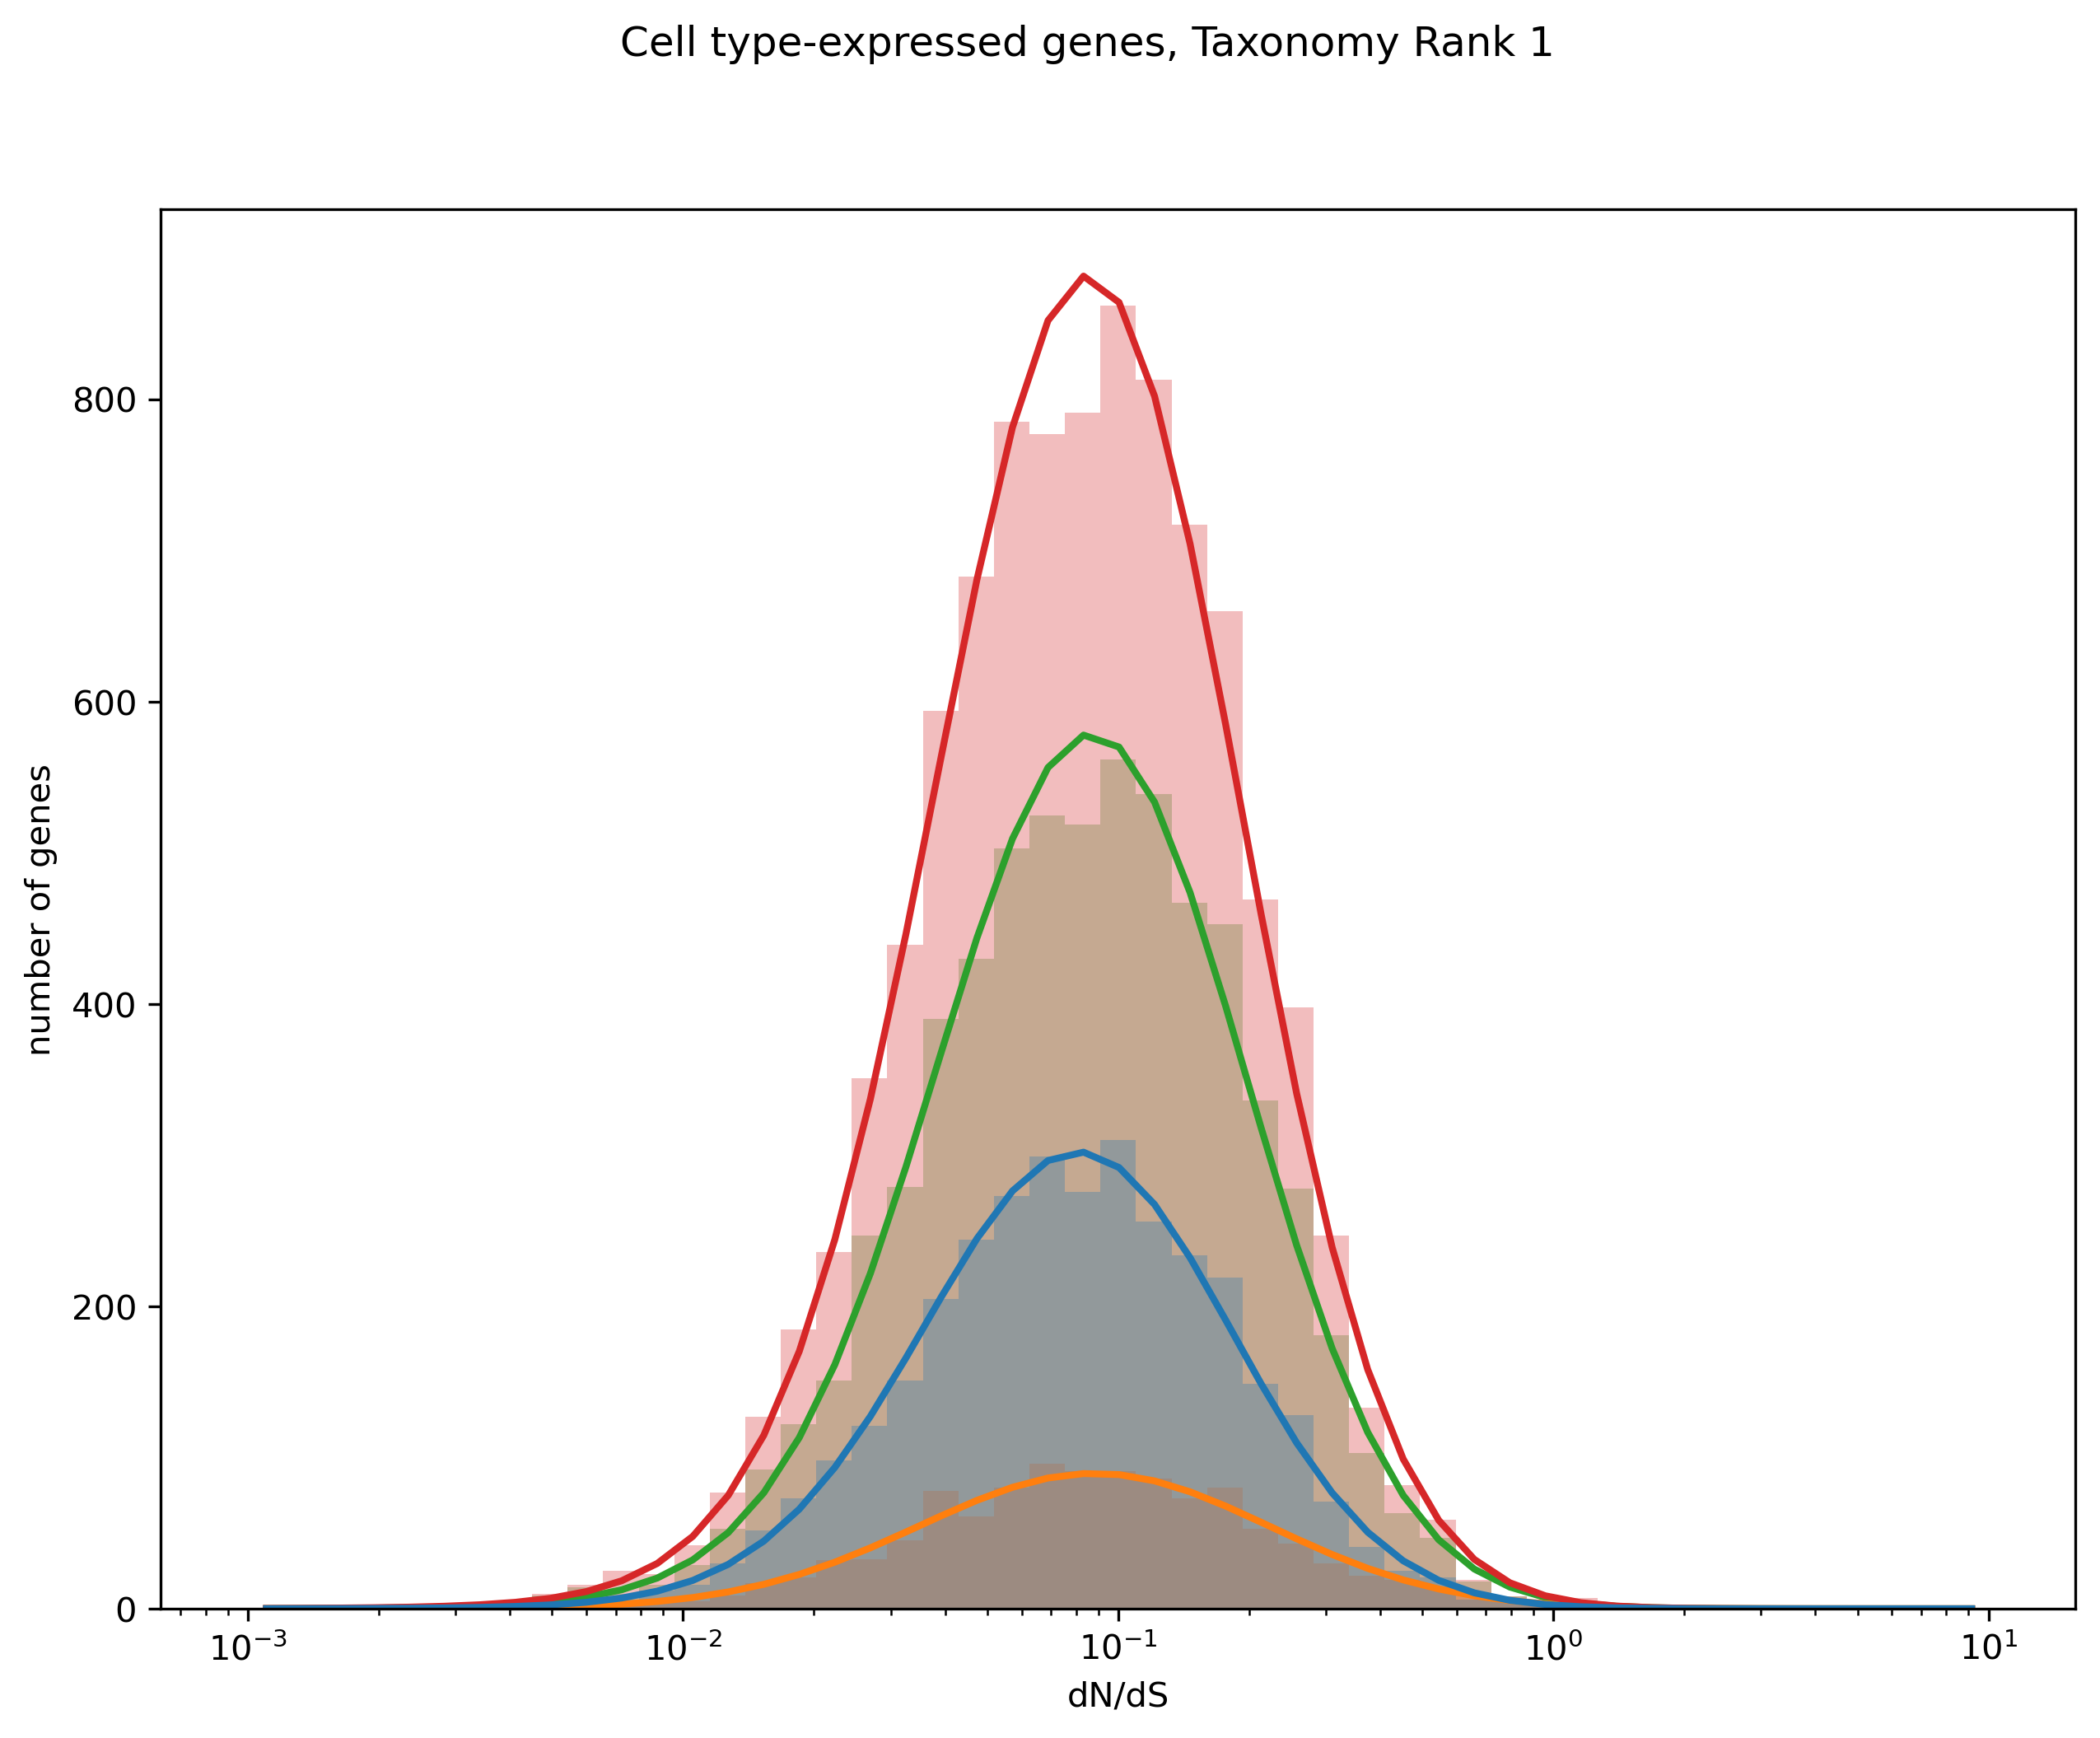

In [174]:
fig = plt.figure(figsize=(10,7.5))
fig.suptitle('Cell type-expressed genes, Taxonomy Rank 1')
grid = plt.GridSpec(nrows=1,ncols=1)
distr_plot = fig.add_subplot(grid[:,:])
bins=np.logspace(np.log10(0.001),np.log10(10), 50)
bins_cntr = (bins[1:] + bins[:-1]) / 2
color_dict={
    'Glia':'tab:green', 
    'Immune cells':'tab:orange', 
    'Neurons':'tab:red', 
    'Vascular cells':'tab:blue'
}
for celltype in TaxonomyRank1_list:
    arr = expressed_avg_dNdS_dict[celltype]['avg_dNdS']
    counts, bin_edges, ignored = distr_plot.hist(arr,bins,histtype='stepfilled',alpha=0.3,color=color_dict[celltype],label='dN/dS of '+celltype+'-specific genes (med={0:.3f})'.format(np.median(arr)))
    try:
        # calculate area of histograms (area under PDF should be 1)
        area_hist = ((bin_edges[1:] - bin_edges[:-1]) * counts).sum()
        shape, loc, scale = stats.lognorm.fit(arr)
        # pdf-values using cdf 
        fit_log_cntr_ = stats.lognorm.cdf(bins, shape, loc=loc, scale=scale)
        fit_log_cntr = np.diff(fit_log_cntr_)
        # plot fitted and scaled PDFs into histogram
        distr_plot.plot(bins_cntr, fit_log_cntr * counts.sum(),color=color_dict[celltype],linestyle='solid', 
                        label='lognormal fit of '+celltype+'-specific dN/dS distribution', linewidth=2)
    except ValueError:
        pass
distr_plot.set_xlabel(xlabel='dN/dS')
distr_plot.set_ylabel(ylabel='number of genes')
distr_plot.set_xscale('log')